# Initialization

In [3]:
from qutip import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import display, Latex, Math
# Define custom LaTeX commands
Latex(r"""
\newcommand{\bra}[1]{\left\langle #1 \right|}
\newcommand{\ket}[1]{\left| #1 \right\rangle}
\newcommand{\braket}[2]{\left\langle {#1{\left| \vphantom{#1 #2} \right.} #2} \right\rangle}
""")

<IPython.core.display.Latex object>

## Settings

In [4]:
# Set display width (set a high number to ensure it doesn't wrap)
pd.set_option('display.width', 200)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', 8)

class BraKetDataFrame(pd.DataFrame):
    def __repr__(self):
        temp = self.copy()
        temp.index = [f'|{i}>' for i in temp.index]
        temp.columns = [f'<{j}|' for j in temp.columns]
        return pd.DataFrame.__repr__(temp)

## Functions

In [5]:
#For displaying matrices nicely
def chop(expr, delta=10**-10):
    return np.ma.masked_inside(expr, -delta, delta).filled(0)

#Arbitrary ANG mode in dimension d
def ANG(d,state):
    #p=[]
    #for i in range(d):
    #    p.append((2*np.pi/d)*i*state)
    return Qobj([1/np.sqrt(d)*np.exp(1j*(2*np.pi/d)*i*state) for i in range(d)])

def heatmap(cross):
    # Plot the heatmap
    plt.axis('off')
    plt.imshow(cross, interpolation='none', cmap='viridis', vmin=0, vmax=1)
    plt.show()

def norm_cross(cross):
    # Normalize every d elements in a row
    d = len(cross) // 2  # Assuming input is always 2*d
    normalized_cross = np.array([
        [row[i * d:(i + 1) * d] / np.sum(row[i * d:(i + 1) * d]) if np.sum(row[i * d:(i + 1) * d]) != 0 else row[i * d:(i + 1) * d] for i in range(2)]
        for row in cross
    ])
    
    # Flatten the normalized chunks back into the original row structure
    normalized_cross = np.array([np.concatenate(row_chunks) for row_chunks in normalized_cross])

    return normalized_cross

# Code

## Create Unitary Operator and Logical Basis 

<IPython.core.display.Latex object>

                    0                   1                   2
0 -0.280609+0.389433j -0.677108-0.337720j -0.011243-0.443784j
1  0.191839+0.551286j  0.268335-0.508099j -0.453615+0.351208j
2 -0.643134-0.123534j -0.287710+0.120520j -0.223151+0.651168j


<IPython.core.display.Latex object>

          <0|       <1|       <2|
|0>  1.0+0.0j  0.0+0.0j  0.0+0.0j
|1>  0.0+0.0j  1.0+0.0j  0.0+0.0j
|2>  0.0+0.0j  0.0+0.0j  1.0+0.0j
          <0|       <1|       <2|
|0>  1.0+0.0j  0.0+0.0j  0.0+0.0j
|1>  0.0+0.0j  1.0+0.0j  0.0+0.0j
|2>  0.0+0.0j  0.0+0.0j  1.0+0.0j


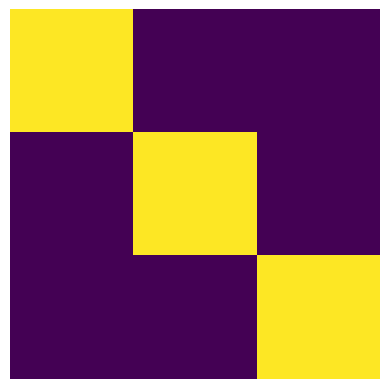

In [6]:
# Define the dension of the Hilbert space
d = 3

#had=gates.snot()

# Define a unitary operator (e.g., a random unitary matrix)
#random_unitary = had
random_unitary = rand_unitary(d)  # Generate a random dxd unitary matrix
display(Latex(r"Random unitary operator ($U$):"))
print(pd.DataFrame(chop(random_unitary.full())))


display(Latex(r"Proof of unitarity: Random unitary operator left and/or right multiplied by its conjugate ($U^{\dagger} U=U U^{\dagger}$):"))
print(BraKetDataFrame(pd.DataFrame(chop((random_unitary.dag() * random_unitary).full()))))
print(BraKetDataFrame(pd.DataFrame(chop((random_unitary * random_unitary.dag()).full()))))

heatmap(abs(chop((random_unitary.dag() * random_unitary).full())))

<IPython.core.display.Latex object>

          <0|       <1|
|0>  1.0+0.0j  0.0+0.0j
|1>  0.0+0.0j  1.0+0.0j




<IPython.core.display.Latex object>

                    <0|                 <1|
|0>  0.707107+0.000000j  0.707107+0.000000j
|1>  0.707107+0.000000j -0.707107+0.000000j


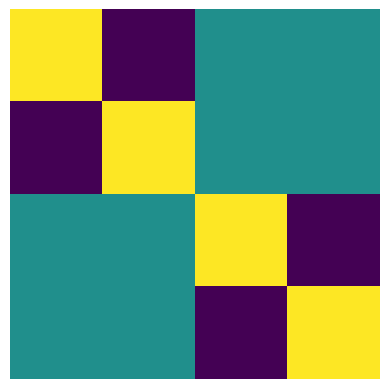

In [266]:
#create the basis states
logical=[basis(d, i) for i in range(d)]
fourier=[ANG(d,i) for i in range(d)]

# Print them
display(Latex(r"Logical Basis States: $\ket{\psi_i}$:"))
print(BraKetDataFrame(pd.DataFrame([state.full().flatten() for state in logical])))
print("\n")
display(Latex(r" Fourier Basis States: $\ket{\phi_i}$:"))
print(BraKetDataFrame(pd.DataFrame([state.full().flatten() for state in fourier])))

heatmap([[np.abs((state.dag() * state2))**2 for state in logical+fourier] for state2 in logical+fourier])

## Apply unitary Matrix to all Logical and Fourier basis states

<IPython.core.display.Latex object>

                    <0|                 <1|
|0>  0.389010-0.116428j  0.290911-0.866306j
|1> -0.869204+0.282135j  0.120356-0.387812j




<IPython.core.display.Latex object>

                    <0|                 <1|
|0> -0.339549+0.117172j  0.290810-0.886796j
|1>  0.889692-0.281826j  0.120600-0.338346j




<IPython.core.display.Latex object>

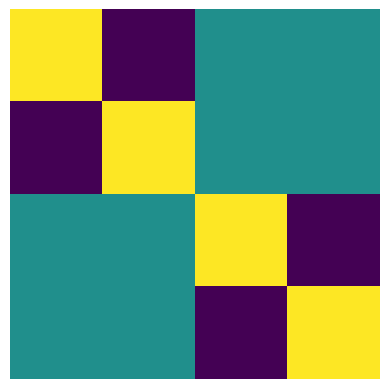

In [267]:
# Iterate through all basis states and apply the unitary operator
logical_outputs,fourier_outputs = [],[]
logical_reout,fourier_reout = [],[]
for state_log,state_four in zip(logical,fourier):
    logical_outputs.append(random_unitary * state_log)  # Store the final state
    fourier_outputs.append(random_unitary * state_four)  # Store the final state
    logical_reout.append(random_unitary.dag() * random_unitary * state_log)  # Store the final state
    fourier_reout.append(random_unitary.dag() * random_unitary * state_four)  # Store the final state

#print(outputs[0].full())
display(Latex(r" Logical Basis States after application of Random Unitary: $U\ket{\psi_i}$:"))
print(BraKetDataFrame(pd.DataFrame([state.full().flatten() for state in logical_outputs])))
print("\n")
display(Latex(r" Fourier Basis States after application of Random Unitary: $U\ket{\phi_i}$:"))
print(BraKetDataFrame(pd.DataFrame([state.full().flatten() for state in fourier_outputs])))
print("\n")

display(Latex(r"Measurement of states with each other after application of the unitary. Basically checking to see if the unitary is unitary."))
heatmap([[np.abs((state.dag()*state2))**2 for state in logical_outputs+fourier_outputs] for state2 in logical_outputs+fourier_outputs])

## Crosstalk matrices measuring in the unperturbed basis

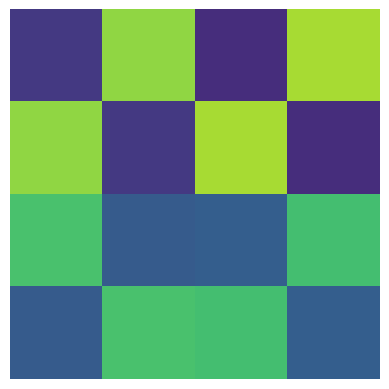

In [268]:
vals=norm_cross([[np.abs((state.dag()*state2))**2 for state2 in logical_outputs+fourier_outputs] for state in logical+fourier])

heatmap(vals)

## Visualize the probability of detection after the process

<IPython.core.display.Latex object>

          <0|       <1|
|0>  0.164884  0.835116
|1>  0.835116  0.164884


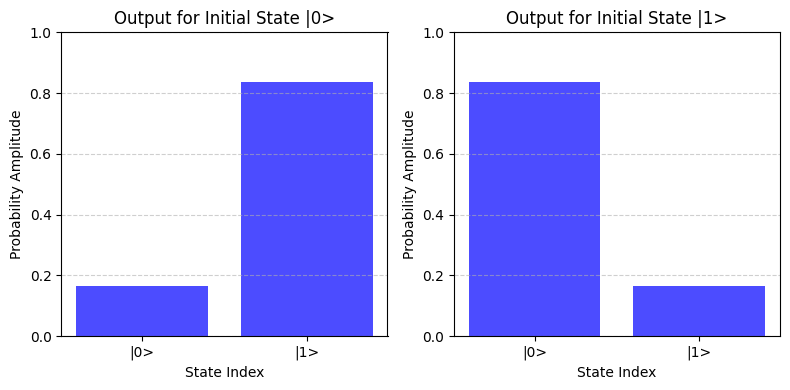

In [270]:
display(Latex(r"Measuring the logical states after the unitary. $\Big|\braket{\psi_i|U|\psi_{i'}}\Big|^2$:"))

logical_prob_outputs=[[np.abs((state.dag()*state2))**2 for state2 in logical] for state in logical_outputs]
logical_prop_op=Qobj(logical_prob_outputs)
print(BraKetDataFrame(pd.DataFrame(chop(logical_prob_outputs))))

# Visualize the outputs as bar charts
plt.figure(figsize=(d//2*8, d//2*4))
for i, final_state in enumerate(logical_prob_outputs):
    plt.subplot(d//2, d//(1 if d==2 else 2), i + 1)  # Create a 2x2 grid of subplots 
    plt.bar(range(d), final_state, color='blue', alpha=0.7)
    plt.ylim(0, 1)
    plt.xlabel("State Index")
    plt.ylabel("Probability Amplitude")
    plt.title(f"Output for Initial State |{i}>")
    plt.xticks(range(d), [f"|{j}>" for j in range(d)])
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<IPython.core.display.Latex object>

          <0|       <1|
|0>  0.545296  0.838243
|1>  0.838243  0.545296


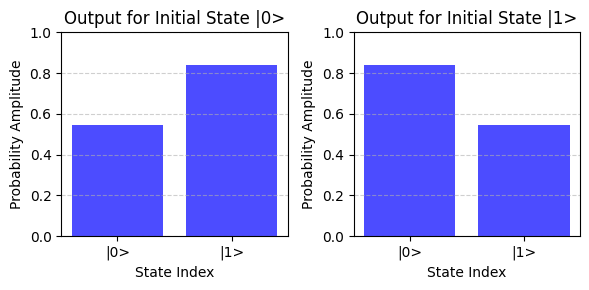

In [271]:
display(Latex(r"Measuring the logical states after the unitary. $\Big|\braket{\phi_i|U|\phi_{i'}}\Big|^2$:"))
fourier_prob_outputs=[[np.abs((state.dag()*state2)) for state in fourier] for state2 in fourier_outputs]
fourier_prop_op=Qobj(fourier_prob_outputs)
print(BraKetDataFrame(pd.DataFrame(chop(fourier_prob_outputs))))

# Visualize the outputs as bar charts
plt.figure(figsize=(d//2*6, d//2*3))
for i, final_state in enumerate(fourier_prob_outputs):
    plt.subplot(d//2, d//(1 if d==2 else 2), i + 1)  # Create a 2x2 grid of subplots 
    plt.bar(range(d), final_state, color='blue', alpha=0.7)
    plt.ylim(0, 1)
    plt.xlabel("State Index")
    plt.ylabel("Probability Amplitude")
    plt.title(f"Output for Initial State |{i}>")
    plt.xticks(range(d), [f"|{j}>" for j in range(d)])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Make a unitary psuedo-similar operator

### Just using Probability of Detection in the logical Basis

In [213]:
display(Latex(r"Inverting matrix is the probability of detection $P = \Big|\braket{\psi_i|U|\psi_{i'}}\Big|^2$:"))
P=logical_prop_op
print(BraKetDataFrame(pd.DataFrame(chop(P.full()))))

<IPython.core.display.Latex object>

                  <0|               <1|
|0>  0.62886+0.00000j  0.37114+0.00000j
|1>  0.37114+0.00000j  0.62886+0.00000j


<IPython.core.display.Latex object>

          <0|       <1|
|0>  0.082320  0.015901
|1>  0.450889  0.517308


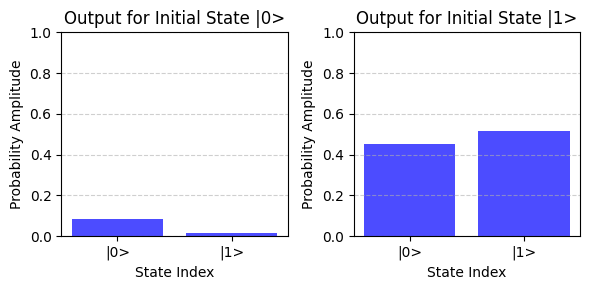

In [214]:
display(Latex(r"Calculating the probability of detection after application of P on transmitted state $\Big|\braket{\psi_i|P^{\dagger} U|\psi_{i'}}\Big|^2$:"))

corrected_logical_outputs=[[np.abs((state.dag()*P.dag()*state2))**2 for state in logical] for state2 in logical_outputs]
print(BraKetDataFrame(pd.DataFrame(chop(corrected_logical_outputs))))

# Visualize the outputs as bar charts
plt.figure(figsize=(d//2*6, d//2*3))
for i, final_state in enumerate(corrected_logical_outputs):
    plt.subplot(d//2, d//(1 if d==2 else 2), i + 1)  # Create a 2x2 grid of subplots 
    plt.bar(range(d), final_state, color='blue', alpha=0.7)
    plt.ylim(0, 1)
    plt.xlabel("State Index")
    plt.ylabel("Probability Amplitude")
    plt.title(f"Output for Initial State |{i}>")
    plt.xticks(range(d), [f"|{j}>" for j in range(d)])
    plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### QR Decomp

![Definition of QR Decomposition](images/QR.png)

<IPython.core.display.Latex object>

Probability matrix (before orthonormalization):
         <0|      <1|
|0>  0.62886  0.37114
|1>  0.37114  0.62886


<IPython.core.display.Latex object>

                    <0|                 <1|
|0> -0.861201+0.000000j -0.508264+0.000000j
|1> -0.508264+0.000000j  0.861201+0.000000j


<IPython.core.display.Latex object>

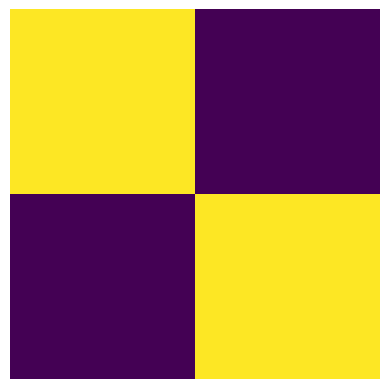

In [229]:
display(Latex(r"Calculating the Orthogonal decomposition matrix of $P$, $Q$:"))

# Ensure that prob_outputs is normalized and orthogonal
logical_prob_matrix = np.array(logical_prob_outputs)  # Transpose to align columns with states
print("Probability matrix (before orthonormalization):")
print(BraKetDataFrame(pd.DataFrame(chop(logical_prob_matrix))))

# Perform QR decomposition to ensure orthonormality
q, r = np.linalg.qr(logical_prob_matrix)  # QR decomposition

unitary_from_probs = Qobj(q)  # Convert to Qobj for compatibility with QuTiP
display(Latex(r"Unitary operator, $Q$, constructed from prob_outputs:"))
print(BraKetDataFrame(pd.DataFrame(chop(unitary_from_probs.full()))))

# Verify unitarity
display(Latex(r"Verification $Q Q^{\dagger}$ is identity:"))
heatmap((unitary_from_probs * unitary_from_probs.dag()).full().real)

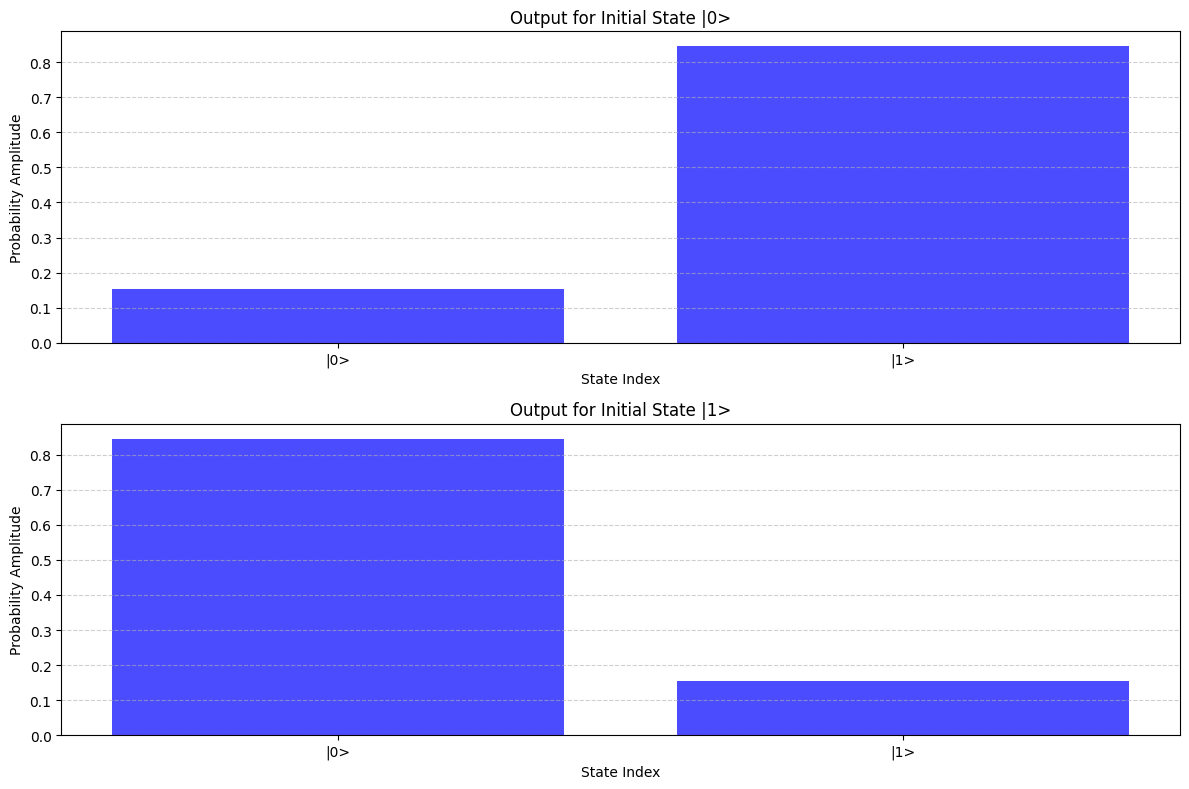

In [231]:
# Iterate through all basis states and apply the unitary operator
outputs_corr = []
for state in logical_outputs:
    logical_outputs = basis(d, i)  # Create basis state |i>
    final_state_corr = unitary_from_probs.dag() * state  # Apply the unitary operator
    outputs_corr.append(final_state_corr)  # Store the final state

# Visualize the outputs as bar charts
plt.figure(figsize=(d//2*12, d//2*8))
for i, final_state_corr in enumerate(outputs_corr):
    plt.subplot(d, d//2, i + 1)  # Create a 2x2 grid of subplots
    probabilities = np.abs(final_state_corr.full().flatten())**2
    plt.bar(range(d), probabilities, color='blue', alpha=0.7)
    plt.xlabel("State Index")
    plt.ylabel("Probability Amplitude")
    plt.title(f"Output for Initial State |{i}>")
    plt.xticks(range(d), [f"|{j}>" for j in range(d)])
    plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

# Failed Neural Network attempt

In [206]:
import numpy as np
from qutip import rand_unitary

# Parameters
num_samples = 50000  # Number of samples in the dataset
d = 4  # Dimension of the Hilbert space

# Initialize lists to store input and target data
input_data = []
target_data = []

for _ in range(num_samples):
    # Generate a random unitary operator
    random_unitary = rand_unitary(d)
    
    # Compute the corresponding vals matrix
    logical = [basis(d, i) for i in range(d)]
    fourier = [ANG(d, i) for i in range(d)]
    logical_outputs = [random_unitary * state for state in logical]
    fourier_outputs = [random_unitary * state for state in fourier]
    vals = norm_cross([[np.abs((state.dag() * state2))**2 for state in logical_outputs + fourier_outputs] for state2 in logical + fourier])
    
    # Flatten the input (vals) and target (random_unitary)
    input_data.append(vals.flatten())
    target_data.append(random_unitary.full().flatten())

# Convert to NumPy arrays
input_data = np.array(input_data)
target_data = np.array(target_data)

# Save the dataset
np.save("input_data.npy", input_data)
np.save("target_data.npy", target_data)

print(f"Dataset created with {num_samples} samples.")
print(f"Input shape: {input_data.shape}, Target shape: {target_data.shape}")

KeyboardInterrupt: 

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


In [55]:

# Load the dataset
input_data = np.load("input_data.npy")  # Shape: (num_samples, input_size)
target_data = np.load("target_data.npy")  # Shape: (num_samples, output_size)

# Split the target data into real and imaginary parts
target_data_real = target_data.real
target_data_imag = target_data.imag

# Combine real and imaginary parts into a single target array
target_data_combined = np.concatenate([target_data_real, target_data_imag], axis=1)

# Define the neural network
input_size = input_data.shape[1]  # Flattened size of vals
output_size = target_data_combined.shape[1]  # Flattened size of random_unitary (real + imag)

model = Sequential([
    Input(shape=(input_size,)),
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(256, activation='relu'),  # Hidden layer 2
    Dense(128, activation='relu'),  # Hidden layer 3
    Dense(output_size)  # Output layer (real + imag parts)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(input_data, target_data_combined, epochs=100, batch_size=32, validation_split=0.2)

# Save the model
model.save("unitary_predictor_model.h5")

print("Model training complete and saved as 'unitary_predictor_model.h5'.")

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1262 - mae: 0.2923 - val_loss: 0.1252 - val_mae: 0.2913
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1250 - mae: 0.2909 - val_loss: 0.1250 - val_mae: 0.2911
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1250 - mae: 0.2911 - val_loss: 0.1251 - val_mae: 0.2912
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1249 - mae: 0.2910 - val_loss: 0.1251 - val_mae: 0.2912
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1249 - mae: 0.2908 - val_loss: 0.1251 - val_mae: 0.2912
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1248 - mae: 0.2909 - val_loss: 0.1251 - val_mae: 0.2912
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1247 - mae: 0.2908 - val_loss: 0.1252 - val_mae: 0.2913
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1246 - mae: 0.2905 - val_loss: 0.1252 - val_mae: 0.2913
Epoch 9/100
1250/1250 ━━━━━━━━━━

Model training complete and saved as 'unitary_predictor_model.h5'.


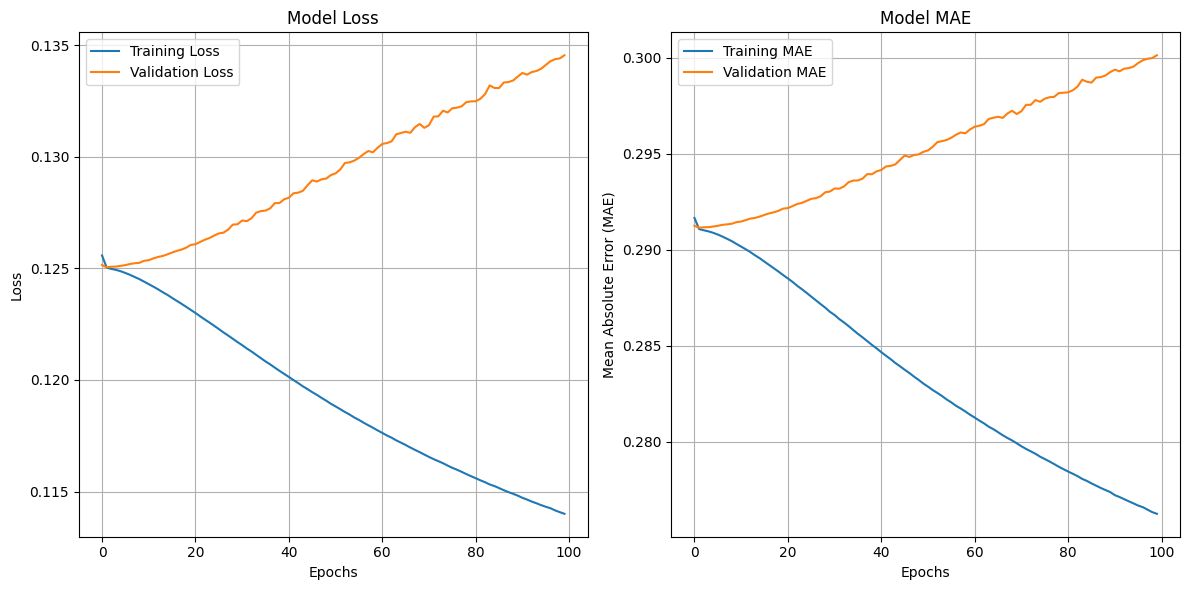

In [56]:
# Visualize the training history
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [62]:
# Generate a random unitary operator
random_unitary = rand_unitary(d)

# Compute the corresponding vals matrix
logical = [basis(d, i) for i in range(d)]
fourier = [ANG(d, i) for i in range(d)]
logical_outputs = [random_unitary * state for state in logical]
fourier_outputs = [random_unitary * state for state in fourier]
vals = norm_cross([[np.abs((state.dag() * state2))**2 for state in logical_outputs + fourier_outputs] for state2 in logical + fourier])

print(random_unitary.full().flatten())

print(vals)

[ 0.07047071+0.24507642j -0.05922241-0.21803913j  0.10275656+0.36495937j
  0.06548665-0.85783467j -0.50464937+0.32138792j  0.42188655-0.33321275j
  0.56681895-0.12242436j -0.05397818+0.11762113j -0.10429195+0.69305865j
 -0.12791738+0.23218782j -0.23158428+0.49386665j -0.21914627+0.30489052j
  0.04024608-0.29014375j -0.22976597-0.73271155j -0.02788868+0.47080885j
 -0.04921365+0.31571746j]
[[6.50285735e-02 5.10483570e-02 1.43754253e-01 7.40168817e-01
  6.23055627e-02 1.27879659e-01 7.17541952e-01 9.22728269e-02]
 [3.57961183e-01 2.89018993e-01 3.36271450e-01 1.67483740e-02
  4.63108840e-02 3.07748229e-01 6.63330503e-02 5.79607837e-01]
 [4.91207099e-01 7.02740394e-02 2.97535549e-01 1.40983313e-01
  8.59648852e-01 3.10855748e-02 1.05606558e-01 3.65901490e-03]
 [8.58031449e-02 5.89658610e-01 2.22438749e-01 1.02099496e-01
  3.17347013e-02 5.33286537e-01 1.10518440e-01 3.24460322e-01]
 [2.96980947e-01 2.76564183e-01 4.06385330e-01 2.00695397e-02
  7.03774548e-02 7.15333481e-05 7.02232681e-01 

In [63]:
# Test the model with a single input

# Generate a single test input (vals matrix)
random_unitary = rand_unitary(d)
logical = [basis(d, i) for i in range(d)]
fourier = [ANG(d, i) for i in range(d)]
logical_outputs = [random_unitary * state for state in logical]
fourier_outputs = [random_unitary * state for state in fourier]
test_vals = norm_cross([[np.abs((state.dag() * state2))**2 for state in logical_outputs + fourier_outputs] for state2 in logical + fourier])

# Flatten the test input
test_input = test_vals.flatten().reshape(1, -1)  # Reshape to match input shape

# Predict using the model
predicted_output = model.predict(test_input)

# Split the predicted output into real and imaginary parts
predicted_real = predicted_output[:, :d**2]
predicted_imag = predicted_output[:, d**2:]

# Combine real and imaginary parts into a complex matrix
predicted_unitary = predicted_real + 1j * predicted_imag
predicted_unitary = predicted_unitary.reshape(d, d)

print(BraKetDataFrame(pd.DataFrame(random_unitary.full())))

# Display the predicted unitary matrix
print("Predicted Unitary Matrix:")
print(BraKetDataFrame(pd.DataFrame(predicted_unitary)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
                    <0|                 <1|                 <2|                 <3|
|0> -0.200024-0.667033j -0.156963+0.236633j  0.322738+0.299858j  0.186045-0.453583j
|1> -0.540472-0.419290j -0.260218-0.229383j -0.322685-0.172834j  0.091548+0.519015j
|2> -0.103180-0.178173j  0.740756-0.000932j -0.549523+0.000220j  0.201479-0.257523j
|3> -0.066736-0.017232j  0.497578+0.052285j  0.491166+0.358758j  0.200306+0.578669j
Predicted Unitary Matrix:
                    <0|                 <1|                 <2|                 <3|
|0> -0.066954-0.123744j  0.237331-0.046887j -0.039692-0.019419j -0.191328+0.066745j
|1> -0.255868+0.077225j -0.126404+0.000638j -0.026642+0.145820j  0.165139+0.016443j
|2> -0.006001+0.126698j -0.120716+0.023238j -0.019446+0.050210j  0.150361+0.141745j
|3>  0.103894+0.035190j -0.009114+0.079843j -0.069616-0.037248j  0.229174-0.038135j


In [65]:
# Iterate through all basis states and apply the unitary operator
logical_outputs,fourier_outputs = [],[]
logical_reout,fourier_reout = [],[]
for state_log,state_four in zip(logical,fourier):
    logical_outputs.append(random_unitary * state_log)  # Store the final state
    fourier_outputs.append(random_unitary * state_four)  # Store the final state
    logical_reout.append(Qobj(predicted_unitary).dag() * random_unitary * state_log)  # Store the final state
    fourier_reout.append(Qobj(predicted_unitary).dag() * random_unitary * state_four)  # Store the final state

<IPython.core.display.Latex object>

          <0|       <1|       <2|       <3|
|0>  0.063424  0.010745  0.015140  0.028741
|1>  0.010146  0.011537  0.005851  0.069777
|2>  0.037907  0.043708  0.009678  0.012542
|3>  0.007872  0.030083  0.002390  0.054217


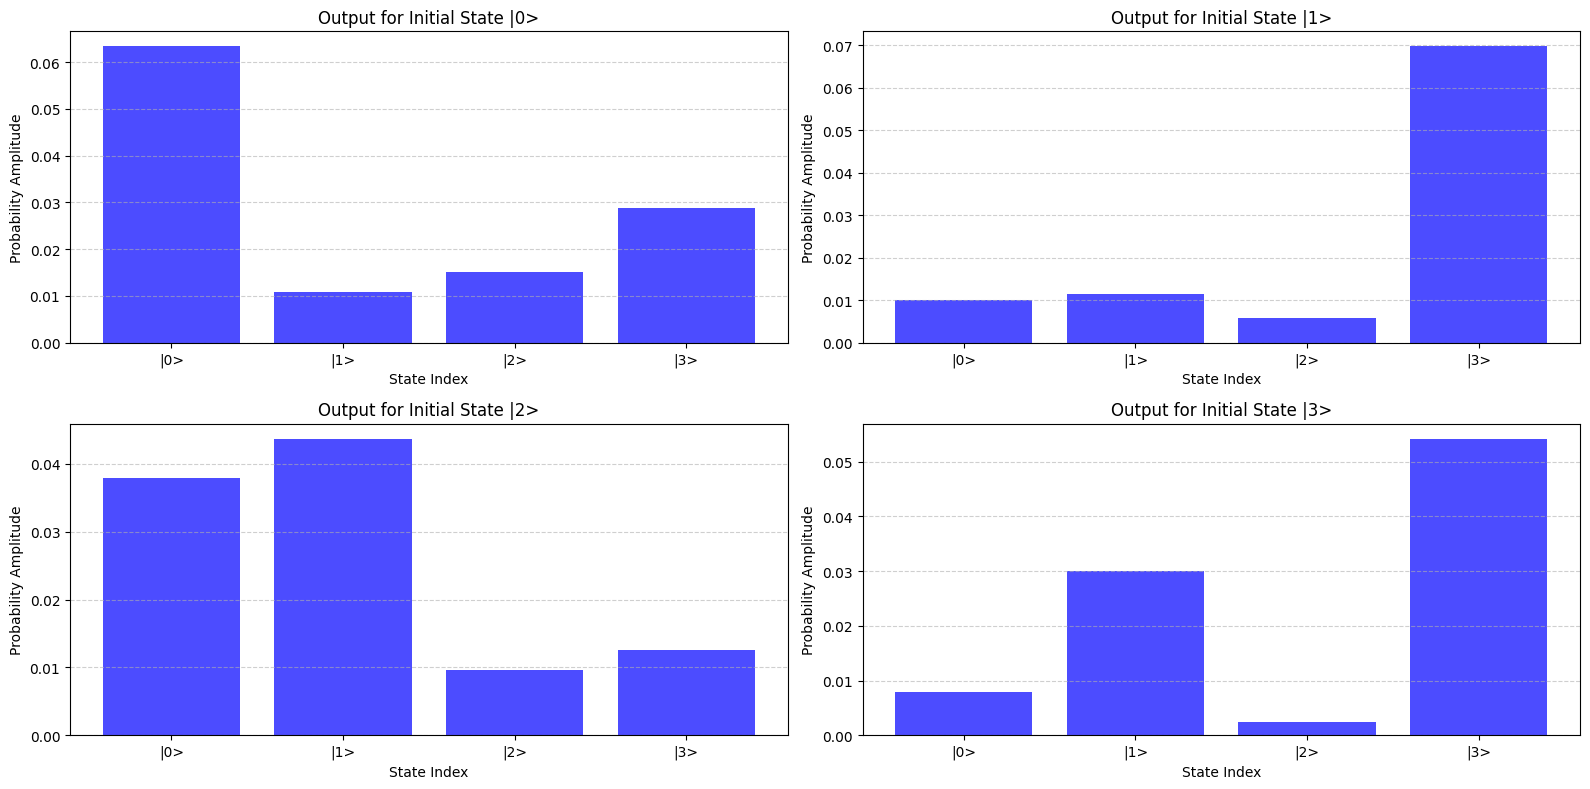

In [66]:
# Visualize the outputs as bar charts
plt.figure(figsize=(d//2*8, d//2*4))

display(Latex(r"Measuring the logical states after the unitary. $\Big|\braket{\psi_i|U|\psi_{i'}}\Big|^2$:"))

logical_prob_outputs=[]
for i, final_state in enumerate(logical_reout):
    plt.subplot(d//2, d//(1 if d==2 else 2), i + 1)  # Create a 2x2 grid of subplots
    probabilities = np.abs(final_state.full().flatten())**2
    logical_prob_outputs.append(probabilities)
    plt.bar(range(d), probabilities, color='blue', alpha=0.7)
    plt.xlabel("State Index")
    plt.ylabel("Probability Amplitude")
    plt.title(f"Output for Initial State |{i}>")
    plt.xticks(range(d), [f"|{j}>" for j in range(d)])
    plt.grid(axis='y', linestyle='--', alpha=0.6)

print(BraKetDataFrame(pd.DataFrame(chop(logical_prob_outputs))))

plt.tight_layout()
plt.show()